# Business Problem

### As a real estate agency, our goal is to provide our clients estimates on the sale price of the house based on current market conditions. Also, to provide recommendations on improvements that can increase the selling price.

### For this project, the goal is to identify to identify minimum 2 coeffecients (factors) that will aid in increasing the value of a house

In [17]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [18]:
#importing the dataset
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


### Using the `date` info to categorize seasons to check for possible seasonal differences in the sale prices.

In [19]:
#getting the month data first 
df['date'] = df['date'].astype('datetime64[ns]')
df['month_of_sale'] = df['date'].dt.month 

In [20]:
# creating a dict to convert the numeric value into month 
months  = {1 : 'January',
           2 : 'February',
           3 : 'March',
           4 : 'April',
           5 : 'May',
           6 : 'June',
           7 : 'July',
           8 : 'August',
           9 : 'September',
           10 : 'October',
           11 : 'November',
           12 : 'December'}

#applying it to the df
df['month_of_sale'] = df['month_of_sale'].map(months)

In [21]:
# defining seasons and adding to the df
seasons = {'March' : 'Spring',
          'April' : 'Spring',
          'May' : 'Spring',
          'June' : 'Summer',
          'July' : 'Summer',
          'August' : 'Summer',
          'September' : 'Autumn',
          'October' : 'Autumn',
          'November' : 'Autumn',
          'December' : 'Winter',
          'January' : 'Winter',
          'February' : 'Winter'}

#applying it to the df
df['season'] = df['month_of_sale'].map(seasons)

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_of_sale,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,October,Autumn
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,December,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,February,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,December,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,February,Winter


In [23]:
#creating a copy of the df for the analysis
df1 = df.copy()

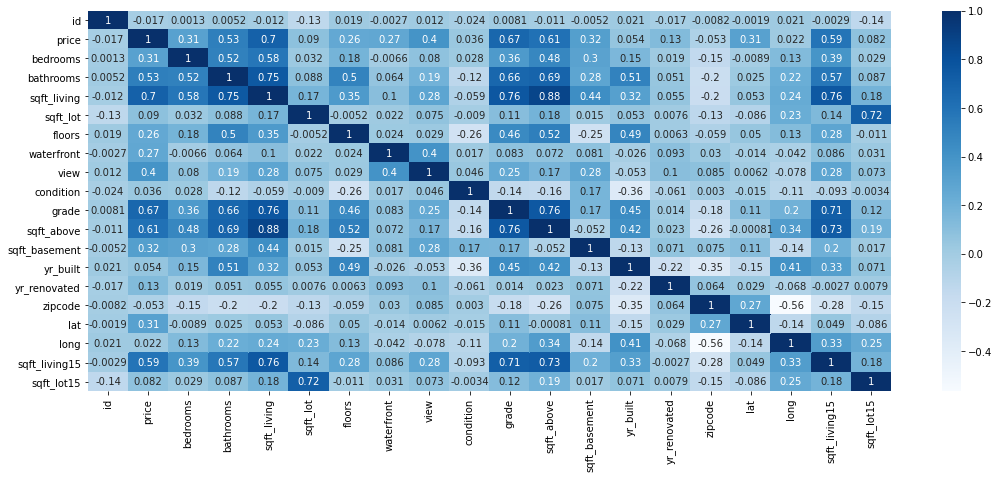

In [24]:
# looking at a heatmap to see which variables are most correlated with price
import seaborn as sns

fig,ax = plt.subplots(figsize=(18,7))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',ax=ax,annot=True);

In [26]:
# removing the id column 
df1.drop('id',axis=1,inplace=True)

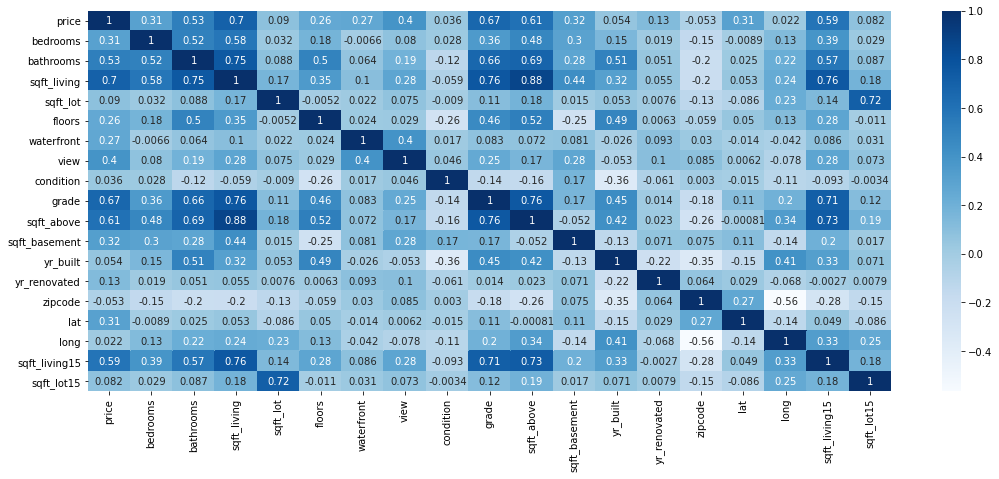

In [15]:
fig,ax = plt.subplots(figsize=(18,7))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',ax=ax,annot=True);

### Since, `season` is of `object` data type, it needs to be converted into an integer to show up in the heat map. For this, we will employ `OneHotEncoder`.

In [28]:
# importing the relevant library
from sklearn.preprocessing import OneHotEncoder
seasons = df1[['season']]

#instantiate
encoder_seasons = OneHotEncoder(categories='auto',sparse=False,handle_unknown='ignore')

#fit it to the data
encoder_seasons.fit(seasons)

#inspecting the categories
encoder_seasons.categories_


[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)]

In [29]:
#transforming the data
seasons_encoded = encoder_seasons.transform(seasons)
seasons_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [30]:
#converting the encoded values into a df
seasons_encoded_df = pd.DataFrame(data=seasons_encoded,index=df1.index)
seasons_encoded_df.head()

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [31]:
#renaming the columns to readability
seasons_encoded_df.rename(columns = {0:'Autumn',1:'Spring',2:'Summer',3:'Winter'},inplace=True)

In [32]:
# adding the encoded values to df1
df1 = pd.concat([df1,seasons_encoded_df],axis=1)
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,month_of_sale,season,Autumn,Spring,Summer,Winter
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,47.5112,-122.257,1340,5650,October,Autumn,1.0,0.0,0.0,0.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,47.7210,-122.319,1690,7639,December,Winter,0.0,0.0,0.0,1.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,47.7379,-122.233,2720,8062,February,Winter,0.0,0.0,0.0,1.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,47.5208,-122.393,1360,5000,December,Winter,0.0,0.0,0.0,1.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,47.6168,-122.045,1800,7503,February,Winter,0.0,0.0,0.0,1.0


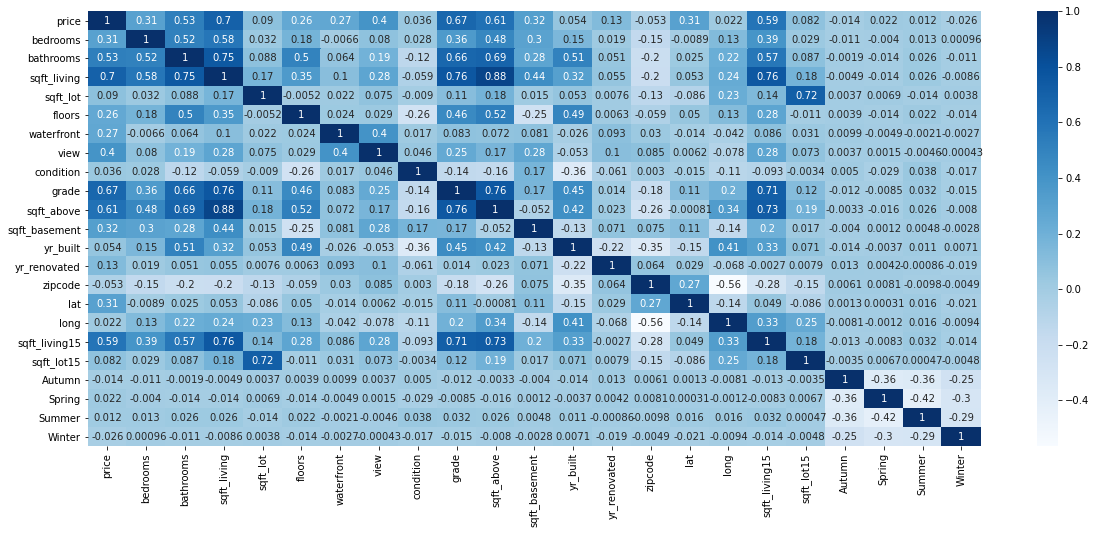

In [34]:
# looking at the updated heatmap
fig,ax = plt.subplots(figsize=(20,8))
corr = df1.corr()
sns.heatmap(corr,cmap='Blues',annot=True);

# Building the model with `statsmodel`

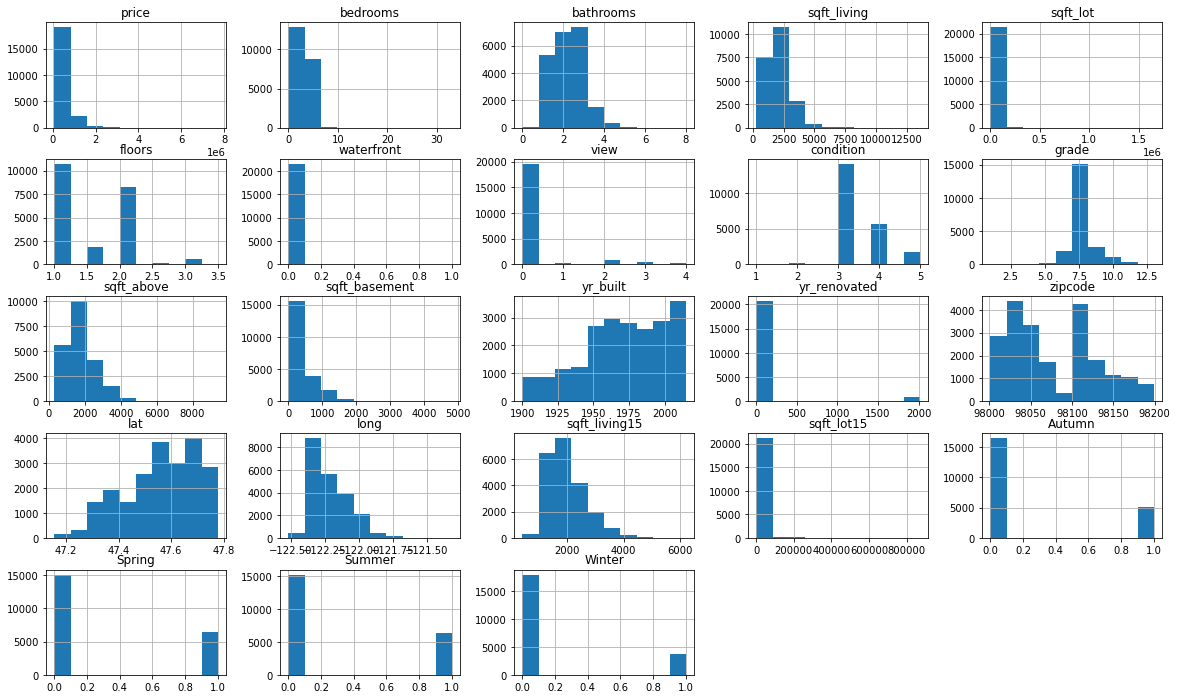

In [73]:
#visualizing the distribution of the variables
fig,ax = plt.subplots(figsize=(20,12))
pd.plotting.hist_frame(df1[columns],ax= ax);

In [36]:
#import the library
from statsmodels.formula.api import ols

In [58]:
#building the baseline model
outcome = 'price'
variables = df1.drop(['price','date','month_of_sale','season'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_baseline = ols(formula=f,data=df1).fit()

model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2530.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:57:30   Log-Likelihood:            -2.9453e+05
No. Observations:               21611   AIC:                         5.891e+05
Df Residuals:                   21590   BIC:                         5.893e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.452e+06   2.34e+06      2.329      0.020    8.63e+05       1e+07
bedrooms      -3.597e+04   1888.758    -19.044      0.000   -3.97e+04   -3.23e+04
bathrooms      4.128e+04   3247.887     12.709      0.000    3.49e+04    4.76e+04
sqft_living     110.6702      2.266     48.836      0.000     106.228     115.112
sqft_lot          0.1271      0.048      2.656      0.008       0.033       0.221
floors         6995.2821   3589.813      1.949      0.051     -41.016     1.4e+04
waterfront     5.838e+05   1.73e+04     33.694      0.000     5.5e+05    6.18e+05
view           5.275e+04   2136.291     24.690      0.000    4.86e+04    5.69e+04
condition      2.706e+04   2350.216     11.514      0.000    2.25e+04    3.17e+04
grade          9.574e+04   2149.047     44.548      0.000    9.15e+04    9.99e+04
sqft_above       71.0450      2.250     31.582      0.000      66.636      75.454
sqft_basement    39.6260      2.642     14.997      0.000      34.447      44.805
yr_built      -2619.8107     72.531    -36.120      0.000   -2761.978   -2477.644
yr_renovated     19.7557      3.649      5.414      0.000      12.603      26.909
zipcode        -584.4168     32.928    -17.749      0.000    -648.957    -519.876
lat            6.029e+05   1.07e+04     56.264      0.000    5.82e+05    6.24e+05
long          -2.152e+05   1.31e+04    -16.414      0.000   -2.41e+05    -1.9e+05
sqft_living15    21.6151      3.442      6.280      0.000      14.869      28.361
sqft_lot15       -0.3857      0.073     -5.274      0.000      -0.529      -0.242
Autumn         1.355e+06   5.85e+05      2.315      0.021    2.08e+05     2.5e+06
Spring         1.384e+06   5.85e+05      2.364      0.018    2.36e+05    2.53e+06
Summer         1.357e+06   5.85e+05      2.318      0.020    2.09e+05     2.5e+06
Winter         1.357e+06   5.85e+05      2.319      0.020     2.1e+05     2.5e+06
==============================================================================
Omnibus:                    18426.545   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1898428.654
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.356   Cond. No.                     1.60e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.59e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
print('R-squared value for baseline model = ',model_baseline.rsquared)

R-squared value for baseline model =  0.700945186471388


### Looks like we have fairly strong R-squared value to begin with. But the kurtosis value is high indicating a large number of outliers in the dataset. Let's see how we can improve it

In [55]:
#looking at the summary statistics for each variable

df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Autumn,Spring,Summer,Winter
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.234257,0.301670,0.292926,0.171147
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.423543,0.458994,0.455115,0.376646
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.000000,1.000000,1.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,1.000000


#### From the above, we can see that the `standard deviaton` for `[sqft living,sqft_lot,sqft_living15,sqft_lot15,yr_renovated]` are quite high

In [57]:
# examining yr_renovated
df1['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

### Looks like `yr_renovated` has 20699 rows of 0 values, indicating that nearly 96% of the houses in the dataset have not been renovated. Hence, we can factor this out from our analysis

In [60]:
outcome = 'price'
variables = df1.drop(['price','date','month_of_sale','season','yr_renovated'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_1 = ols(formula=f,data=df1).fit()

model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2658.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:58:03   Log-Likelihood:            -2.9455e+05
No. Observations:               21611   AIC:                         5.891e+05
Df Residuals:                   21591   BIC:                         5.893e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.373e+06   2.34e+06      2.728      0.006    1.79e+06     1.1e+07
bedrooms       -3.63e+04   1888.978    -19.219      0.000      -4e+04   -3.26e+04
bathrooms       4.36e+04   3221.547     13.534      0.000    3.73e+04    4.99e+04
sqft_living     110.7460      2.268     48.839      0.000     106.301     115.191
sqft_lot          0.1236      0.048      2.581      0.010       0.030       0.217
floors         8019.7063   3587.171      2.236      0.025     988.587    1.51e+04
waterfront     5.891e+05   1.73e+04     34.024      0.000    5.55e+05    6.23e+05
view           5.311e+04   2136.636     24.856      0.000    4.89e+04    5.73e+04
condition      2.487e+04   2316.476     10.734      0.000    2.03e+04    2.94e+04
grade          9.615e+04   2149.069     44.742      0.000    9.19e+04       1e+05
sqft_above       70.9808      2.251     31.534      0.000      66.569      75.393
sqft_basement    39.7721      2.644     15.042      0.000      34.590      44.955
yr_built      -2745.0786     68.786    -39.907      0.000   -2879.905   -2610.252
zipcode        -589.1986     32.937    -17.889      0.000    -653.758    -524.639
lat            6.006e+05   1.07e+04     56.057      0.000     5.8e+05    6.22e+05
long          -2.126e+05   1.31e+04    -16.213      0.000   -2.38e+05   -1.87e+05
sqft_living15    20.6139      3.439      5.994      0.000      13.873      27.355
sqft_lot15       -0.3802      0.073     -5.195      0.000      -0.524      -0.237
Autumn         1.585e+06   5.84e+05      2.714      0.007     4.4e+05    2.73e+06
Spring         1.614e+06   5.84e+05      2.763      0.006    4.69e+05    2.76e+06
Summer         1.587e+06   5.84e+05      2.717      0.007    4.42e+05    2.73e+06
Winter         1.587e+06   5.84e+05      2.717      0.007    4.42e+05    2.73e+06
==============================================================================
Omnibus:                    18425.612   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1895534.602
Skew:                           3.576   Prob(JB):                         0.00
Kurtosis:                      48.320   Cond. No.                     1.66e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.99e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655


### Looks like there is no improvement in the R-squared and Kurtosis values

In [66]:
#removing sqft_living15 and sqft_lot15
outcome = 'price'
variables = df1.drop(['price','date','month_of_sale','season','yr_renovated','sqft_lot15'],axis=1)
variables_sum = '+'.join(variables.columns)

f = outcome + '~' + variables_sum
model_2 = ols(formula=f,data=df1).fit()

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2801.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:10:20   Log-Likelihood:            -2.9456e+05
No. Observations:               21611   AIC:                         5.892e+05
Df Residuals:                   21592   BIC:                         5.893e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.885e+06   2.34e+06      2.519      0.012    1.31e+06    1.05e+07
bedrooms      -3.585e+04   1888.115    -18.989      0.000   -3.96e+04   -3.22e+04
bathrooms      4.402e+04   3222.469     13.661      0.000    3.77e+04    5.03e+04
sqft_living     110.1834      2.266     48.617      0.000     105.741     114.626
sqft_lot         -0.0477      0.035     -1.374      0.170      -0.116       0.020
floors         8662.3886   3587.194      2.415      0.016    1631.224    1.57e+04
waterfront     5.879e+05   1.73e+04     33.942      0.000    5.54e+05    6.22e+05
view           5.305e+04   2137.896     24.816      0.000    4.89e+04    5.72e+04
condition      2.469e+04   2317.621     10.653      0.000    2.01e+04    2.92e+04
grade          9.645e+04   2149.615     44.868      0.000    9.22e+04    1.01e+05
sqft_above       70.5072      2.251     31.329      0.000      66.096      74.918
sqft_basement    39.6748      2.645     14.998      0.000      34.490      44.860
yr_built      -2748.9729     68.824    -39.942      0.000   -2883.872   -2614.074
zipcode        -590.5157     32.956    -17.918      0.000    -655.112    -525.919
lat            6.019e+05   1.07e+04     56.163      0.000    5.81e+05    6.23e+05
long          -2.181e+05   1.31e+04    -16.684      0.000   -2.44e+05   -1.93e+05
sqft_living15    19.7414      3.437      5.744      0.000      13.004      26.478
Autumn         1.463e+06   5.84e+05      2.506      0.012    3.19e+05    2.61e+06
Spring         1.492e+06   5.84e+05      2.555      0.011    3.47e+05    2.64e+06
Summer         1.465e+06   5.84e+05      2.508      0.012     3.2e+05    2.61e+06
Winter         1.465e+06   5.84e+05      2.509      0.012     3.2e+05    2.61e+06
==============================================================================
Omnibus:                    18429.713   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1898911.833
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      48.361   Cond. No.                     1.58e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.6e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
print('R-squared value for the baseline model = ',model_baseline.rsquared)
print('R-squared value for model_1 = ',model_1.rsquared)
print('R-squared value for model_2 = ',model_2.rsquared)

R-squared value for the baseline model =  0.700945186471388
R-squared value for model_1 =  0.7005392456518655
R-squared value for model_2 =  0.7001649223954842
